X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


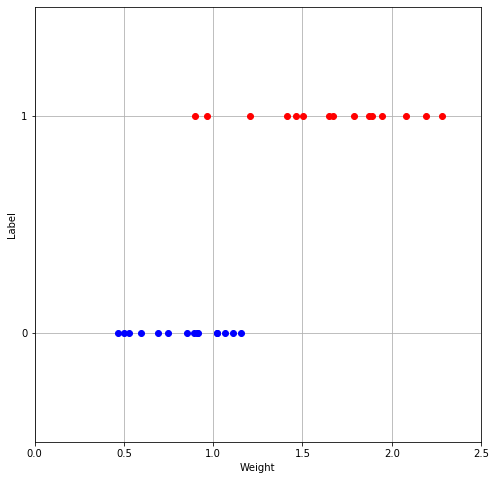

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=0)
X_min = 0
X_max = 2.5
X_n = 30 #총데이터 개수(30개)
X_col = ['cornflowerblue', 'gray'] #그래프 색 지정
X = np.zeros(X_n)
T = np.zeros(X_n, dtype = np.uint8) #X, T 초기화, unsigned int 8bit(굳이 쓰지 않아도 괜찮음)
Dist_s = [0.4, 0.8]
Dist_w = [0.8, 1.6]
Pi = 0.5
for n in range(X_n): #n은 0부터 29까지
    wk = np.random.rand() 
    T[n] = 0 * (wk<Pi) + 1 * (wk>=Pi)#0.5를 기준으로 작으면 0, 크면 1
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] #암컷은 0.4~1.2, 수컷은 0.8~2.4
    
print('X=' + str(np.round(X,2)))
print('T=' + str(T))

def show_data1(x,t):
    K = np.max(t) + 1#0,1
    for k in range(K):
        if k == 0:
            plt.plot(x[t==0], t[t==0], 'bo')#
        else:
            plt.plot(x[t==1], t[t==1], 'ro')
            
        plt.grid(True)
        plt.ylim(-0.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0,1])
    plt.xlabel('Weight')
    plt.ylabel('Label')
    
fig=plt.figure(figsize=(8,8))
show_data1(X,T)
plt.show()

1.8686868686868687

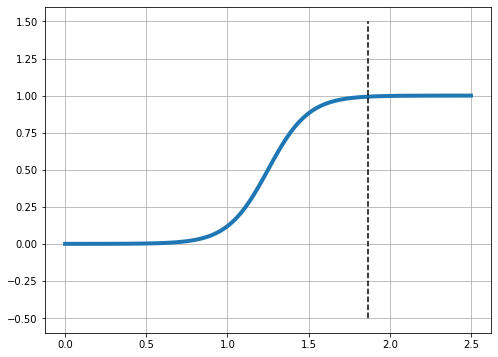

In [5]:
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0]*x+w[1])))
    return y

def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, '-', linewidth=4)
    
    i = np.min(np.where(y>0.5))#결정경계 찾기
    B = (xb[i-1]+xb[i]/2)
    plt.plot([B,B], [-0.5, 1.5], 'k--')
    plt.grid(True)
    return B

W = [8, -10]
plt.figure(figsize=(8,6))
show_logistic(W)

In [6]:
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee=0
    for n in range(len(y)):
        cee = cee - (t[n]*np.log(y[n])+(1-t[n])*np.log(1-y[n]))
    cee = cee/X_n
    return cee

W = [1,1]
cee_logistic(W,X,T)

1.0288191541851066

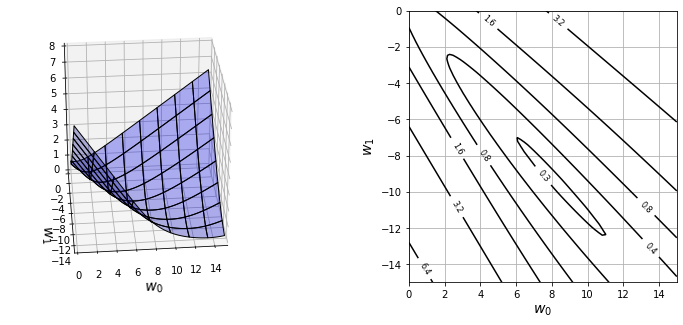

In [9]:
from mpl_toolkits.mplot3d import Axes3D

xn=80
w_range=np.array([[0,15],[-15,0]])
x0 = np.linspace(w_range[0,0], w_range[0,1], xn)
x1 = np.linspace(w_range[1,0], w_range[1,1], xn)
xx0, xx1 = np.meshgrid(x0, x1) #2x2행렬
C = np.zeros((len(x1), len(x0))) #위에 그림을 그릴 데이터
w = np.zeros(2) #파라메터, 2개 다 0으로 세팅
for i0 in range(xn):
    for i1 in range(xn):
             w[0] = x0[i0]
             w[1] = x1[i1]
             C[i1,i0] = cee_logistic(w,X,T)
        
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1,projection='3d') #3차원 
ax.plot_surface(xx0,xx1,C,color='blue',edgecolor='black',rstride=10,cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)
             
plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1,C,20,colors='black',levels=[0.26,0.4,0.8,1.6,3.2,6.4]) #등고선
cont.clabel(fmt='%.1f',fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

In [13]:
def dcee_logistic(w,x,t):
    y = logistic(x,w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n]-t[n])*x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee/X_n
    return dcee

W=[1,1]
dcee_logistic(W,X,T)

array([0.30857905, 0.39485474])

w0=8.18, w1=-9.38
CEE=0.25
Boundary=1.72


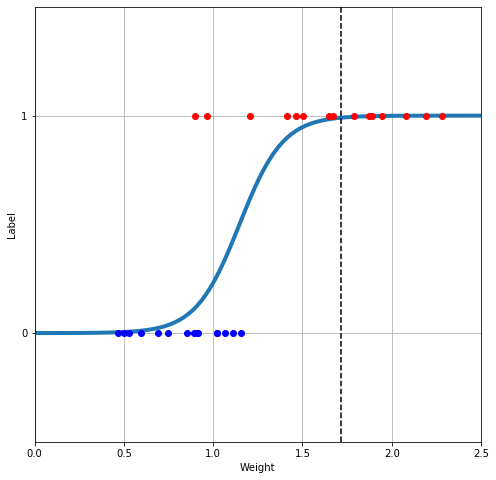

In [14]:
from scipy.optimize import minimize

def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x,t), jac=dcee_logistic, method='CG') #arg : w에 대한 최적화이므로 x,t제외, CG는 경사하강법
    return res1.x

plt.figure(figsize=(8,8))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0={0:.2f}, w1={1:.2f}".format(W[0],W[1]))
B = show_logistic(W)
show_data1(X,T)
plt.ylim(-0.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE={0:.2f}".format(cee))
print("Boundary={0:.2f}".format(B))
plt.show()